# Preprocessing

In [231]:
# Libraries and prameters
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer


# Functions

In [232]:
# Import data
data = pd.read_csv("../preproc_data/data_with_new_features.csv", index_col=0)
data.head(2)

,id,game_id,inning,side,hitter_id,hitter_hand,pitcher_id,pitcher_hand,temp_f,weather_condition,humidity,wind_speed_mph,at_bat_end_time,pitch_location_zone,pitch_type_code,pitch_speed_mph,pitch_count_at_bat,pitcher_pitch_count_at_bat_start,outs_at_start,y_target,day_night,home_team_id,away_team_id,attendance,stadium_id,hitter_player_name,hitter_position,hitter_primary_position,hitter_zone_strikes,hitter_zone_balls,pitcher_player_name,pitcher_primary_position,pitcher_zone_strikes,pitcher_zone_balls,stadium_capacity,stadium_stadium_type,stadium_lat,stadium_lon,away_stadium_lat,away_stadium_lon,hitter_previous_stats_szn,rolling_1ab,rolling_3ab,rolling_10ab,pitcher_previous_stats_szn,rolling_1pitch,rolling_3pitch,rolling_10pitch,handed_matchup,hitter_ab_count,pitcher_ab_count,match_up_ab_count_delta
20,c6204c5e-4037-40dd-a2d0-cd21fcad30b0,f3f0ae8e-cb65-4e96-9530-c6f868738f09,3,T,041632a9-afb2-4ec3-b1de-9b0bbe33ab64,L,eebc991a-23ea-4f1c-ba3b-37ff21ee1603,R,40.0,Sunny,30.0,2.0,2023-03-30 17:48:48+00:00,1.0,FF,97.7,5.0,44.0,1.0,0,D,a09ec676-f887-43dc-bbb3-cf4bbaee9a18,a7723160-10b7-4277-a309-d8dd95a8ae65,46172.0,706e9828-6687-4ac8-a409-3fb972e8bae9,"Wade Jr., LaMonte",IF,1B,0.309963,0.496552,"Cole, Gerrit",SP,0.674491,0.325509,47309.0,outdoor,40.828819,-73.926569,37.77842,-122.390621,0.5,1.0,1.0,1.0,0.200000,0.0,0.0,0.222222,LR,0,0,0
23,d46669f3-7ab1-4af2-af9a-56e2599a8dee,f3f0ae8e-cb65-4e96-9530-c6f868738f09,3,T,e5bdeb0e-38fc-4d30-8127-43d0d5b2864d,L,eebc991a-23ea-4f1c-ba3b-37ff21ee1603,R,40.0,Sunny,30.0,2.0,2023-03-30 17:50:34+00:00,6.0,FF,97.5,5.0,49.0,2.0,0,D,a09ec676-f887-43dc-bbb3-cf4bbaee9a18,a7723160-10b7-4277-a309-d8dd95a8ae65,46172.0,706e9828-6687-4ac8-a409-3fb972e8bae9,"Conforto, Michael",OF,RF,0.266667,0.459459,"Cole, Gerrit",SP,0.674491,0.325509,47309.0,outdoor,40.828819,-73.926569,37.77842,-122.390621,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.200000,LR,0,1,1


In [233]:
# Remove last columns
data = data.drop(columns=["id", "game_id", "hitter_id", "pitcher_id", "home_team_id", "away_team_id",
                   "stadium_id", "stadium_lat", "stadium_lon", "away_stadium_lat", "away_stadium_lon",
                   "at_bat_end_time", "pitcher_primary_position", "hitter_player_name", "pitcher_player_name",
                   "hitter_primary_position", "weather_condition", "inning", "side", "day_night", "attendance",
                   "stadium_capacity", "stadium_stadium_type",
                   "pitch_location_zone", "hitter_hand", "pitcher_hand", "pitch_count_at_bat", "pitch_speed_mph"])
data.head(2)

,temp_f,humidity,wind_speed_mph,pitch_type_code,pitcher_pitch_count_at_bat_start,outs_at_start,y_target,hitter_position,hitter_zone_strikes,hitter_zone_balls,pitcher_zone_strikes,pitcher_zone_balls,hitter_previous_stats_szn,rolling_1ab,rolling_3ab,rolling_10ab,pitcher_previous_stats_szn,rolling_1pitch,rolling_3pitch,rolling_10pitch,handed_matchup,hitter_ab_count,pitcher_ab_count,match_up_ab_count_delta
20,40.0,30.0,2.0,FF,44.0,1.0,0,IF,0.309963,0.496552,0.674491,0.325509,0.5,1.0,1.0,1.0,0.200000,0.0,0.0,0.222222,LR,0,0,0
23,40.0,30.0,2.0,FF,49.0,2.0,0,OF,0.266667,0.459459,0.674491,0.325509,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.200000,LR,0,1,1


In [234]:
x = "TR"
x[0]

'T'

In [235]:
data.handed_matchup = data.handed_matchup.apply((lambda x: 1 if x[0]!=x[1] else 0))
data.handed_matchup

20        1
23        1
28        0
30        0
32        1
35        0
37        1
39        1
40        0
42        0
44        0
46        0
48        1
50        0
54        0
55        1
58        1
60        0
62        0
65        1
68        0
71        0
72        0
76        1
77        1
79        0
82        0
84        1
86        1
89        0
90        1
91        0
93        0
95        0
96        0
99        1
103       1
104       1
106       0
107       1
108       0
110       1
114       1
115       0
116       1
117       1
118       0
119       1
122       1
123       0
124       0
126       0
127       1
128       1
129       1
130       1
131       1
133       0
136       0
137       0
138       1
139       0
140       0
141       0
142       0
143       0
144       0
147       0
149       1
151       0
152       1
154       1
155       1
156       0
157       1
159       0
161       0
163       0
164       1
165       1
167       1
168       0
170       0
171 

In [236]:
# # Convert weather_condition to 3 categories
# categories = pd.read_csv("../raw_data/Classeur2.csv",sep=";", index_col="weather_condition")
# categories = categories.to_dict()["weather_cat"]

# data.weather_condition = data.weather_condition.replace(categories)
# data.weather_condition.value_counts(dropna=False)

In [237]:
X = data.drop(columns=["y_target"])
y = data.y_target

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [239]:
data.head(2)

,temp_f,humidity,wind_speed_mph,pitch_type_code,pitcher_pitch_count_at_bat_start,outs_at_start,y_target,hitter_position,hitter_zone_strikes,hitter_zone_balls,pitcher_zone_strikes,pitcher_zone_balls,hitter_previous_stats_szn,rolling_1ab,rolling_3ab,rolling_10ab,pitcher_previous_stats_szn,rolling_1pitch,rolling_3pitch,rolling_10pitch,handed_matchup,hitter_ab_count,pitcher_ab_count,match_up_ab_count_delta
20,40.0,30.0,2.0,FF,44.0,1.0,0,IF,0.309963,0.496552,0.674491,0.325509,0.5,1.0,1.0,1.0,0.200000,0.0,0.0,0.222222,1,0,0,0
23,40.0,30.0,2.0,FF,49.0,2.0,0,OF,0.266667,0.459459,0.674491,0.325509,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.200000,1,0,1,1


In [244]:
# num_col = make_column_selector(dtype_include=np.number)
num_col = ["temp_f", "humidity", "wind_speed_mph", "pitcher_pitch_count_at_bat_start", "outs_at_start",
           "hitter_ab_count", "pitcher_ab_count", "match_up_ab_count_delta"]

num_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    MinMaxScaler()
)


# bin_cat_col = ["pitcher_hand"]
# bin_cat_transformer = make_pipeline(
#     SimpleImputer(strategy="most_frequent"),
#     OrdinalEncoder()
# )

cat_col = ["hitter_position", "pitch_type_code"]
cat_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse_output=True, drop="if_binary")
)

preproc_transformer = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough'
)

preproc = make_pipeline(preproc_transformer)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['temp_f', 'humidity',
                                                   'wind_speed_mph',
                                                   'pitcher_pitch_count_at_bat_start',
                                                   'outs_at_start',
                                                   'hitter_ab_count',
                                                   'pitcher_ab_count',
                                                   'match_up_ab_count_delta']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['hitter_position',
                                                   'pitch_type_code'])]))])

In [245]:
preproc.fit(X_train)

X_train_preproc = preproc.transform(X_train)
X_train_preproc = pd.DataFrame(X_train_preproc, columns=preproc.get_feature_names_out(), index=X_train.index)

X_test_preproc = preproc.transform(X_test)
X_test_preproc = pd.DataFrame(X_test_preproc, columns=preproc.get_feature_names_out(), index=X_test.index)

In [246]:
X_train_preproc.shape

(98651, 42)

In [247]:
X_train_preproc.head(2)

,pipeline-1__temp_f,pipeline-1__humidity,pipeline-1__wind_speed_mph,pipeline-1__pitcher_pitch_count_at_bat_start,pipeline-1__outs_at_start,pipeline-1__hitter_ab_count,pipeline-1__pitcher_ab_count,pipeline-1__match_up_ab_count_delta,pipeline-2__hitter_position_C,pipeline-2__hitter_position_DH,pipeline-2__hitter_position_IF,pipeline-2__hitter_position_OF,pipeline-2__hitter_position_P,pipeline-2__pitch_type_code_CH,pipeline-2__pitch_type_code_CS,pipeline-2__pitch_type_code_CU,pipeline-2__pitch_type_code_EP,pipeline-2__pitch_type_code_FA,pipeline-2__pitch_type_code_FC,pipeline-2__pitch_type_code_FF,pipeline-2__pitch_type_code_FO,pipeline-2__pitch_type_code_FS,pipeline-2__pitch_type_code_KC,pipeline-2__pitch_type_code_KN,pipeline-2__pitch_type_code_SC,pipeline-2__pitch_type_code_SI,pipeline-2__pitch_type_code_SL,pipeline-2__pitch_type_code_ST,pipeline-2__pitch_type_code_SV,remainder__hitter_zone_strikes,remainder__hitter_zone_balls,remainder__pitcher_zone_strikes,remainder__pitcher_zone_balls,remainder__hitter_previous_stats_szn,remainder__rolling_1ab,remainder__rolling_3ab,remainder__rolling_10ab,remainder__pitcher_previous_stats_szn,remainder__rolling_1pitch,remainder__rolling_3pitch,remainder__rolling_10pitch,remainder__handed_matchup
32444,0.325301,0.562500,0.163265,0.513043,1.0,0.201389,0.177711,0.472696,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289720,0.450382,0.536256,0.463744,0.387097,0.0,0.0,0.3,0.390625,1.0,0.666667,0.5,1.0
73157,0.445783,0.614583,0.142857,0.026087,0.5,0.375000,0.171687,0.383959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286792,0.321678,0.646018,0.353982,0.325688,0.0,0.0,0.3,0.299145,0.0,0.000000,0.1,0.0


In [248]:
X_train_preproc.to_csv("../preproc_data/X_train_preproc.csv")
X_test_preproc.to_csv("../preproc_data/X_test_preproc.csv")

y_train.to_csv("../preproc_data/y_train.csv")
y_test.to_csv("../preproc_data/y_test.csv")

remainder__rolling_1pitch                0.011224
pipeline-2__pitch_type_code_FA           0.011944
pipeline-1__hitter_ab_count              0.012950
remainder__rolling_10pitch               0.013310
remainder__rolling_3ab                   0.015025
remainder__handed_matchup                0.015860
remainder__rolling_10ab                  0.017628
pipeline-2__pitch_type_code_SI           0.041299
pipeline-2__pitch_type_code_FF           0.049005
remainder__hitter_zone_balls             0.057658
remainder__hitter_zone_strikes           0.058690
remainder__hitter_previous_stats_szn     0.147207
remainder__pitcher_previous_stats_szn    0.166124
y_target                                 1.000000
Name: y_target, dtype: float64

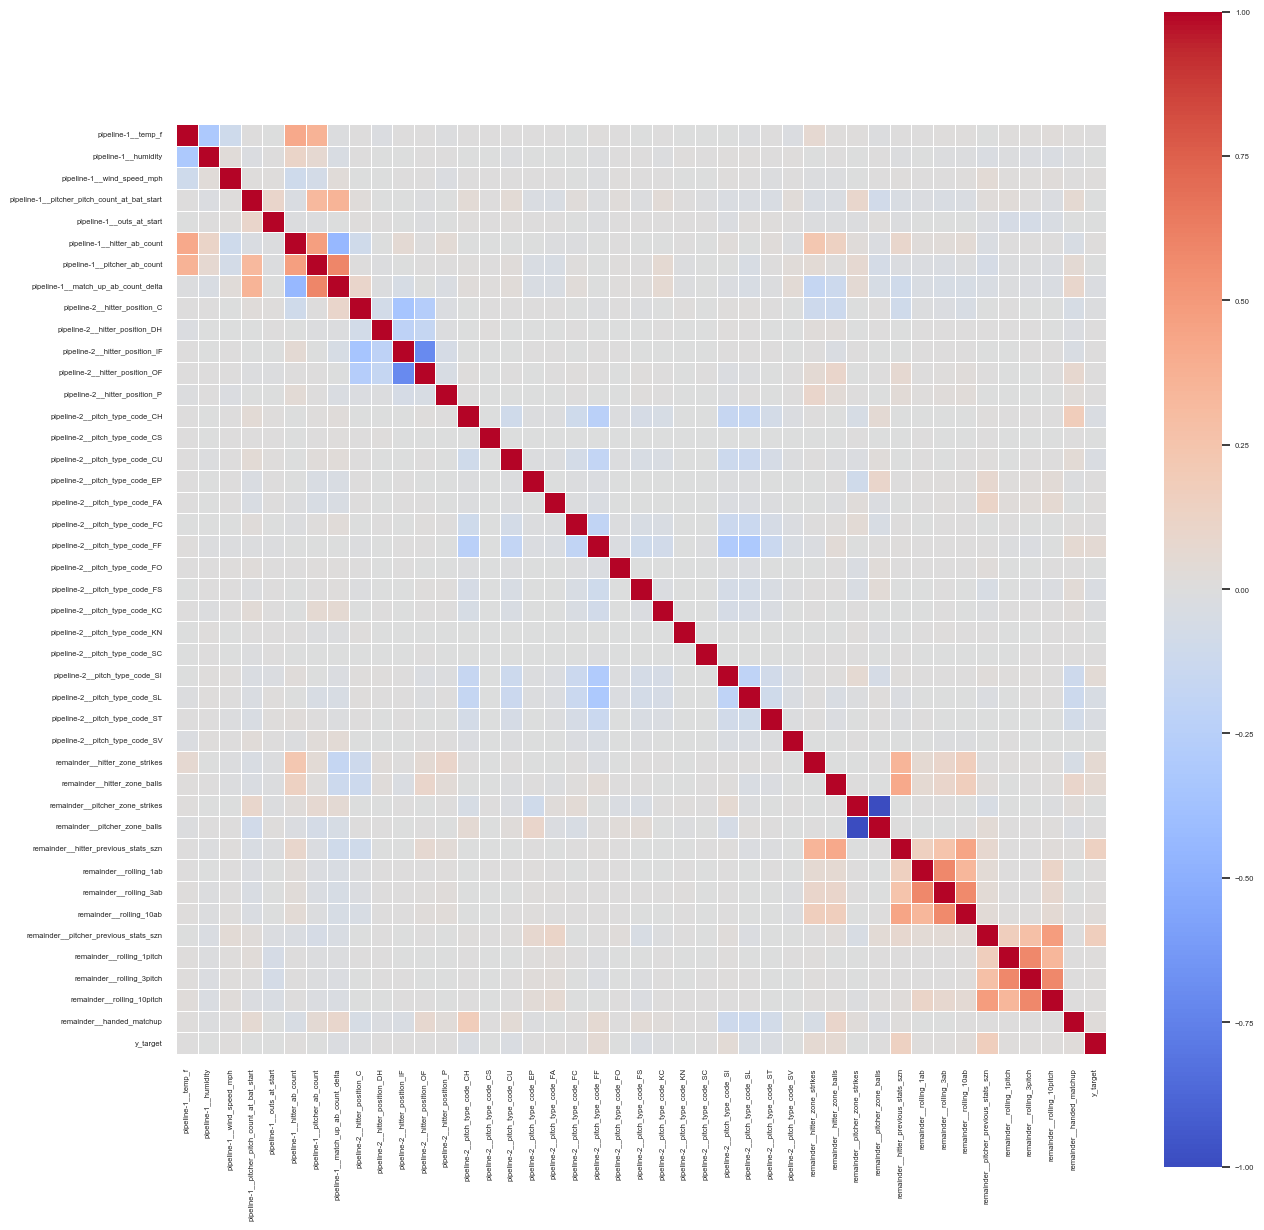

In [249]:
test = X_train_preproc.merge(y_train, right_index=True, left_index=True)
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.5)
sns.heatmap(test.corr(), cmap='coolwarm', linewidths=.5, cbar=True, square=True)
test.corr()["y_target"].sort_values()[test.corr()["y_target"]>=0.01]